In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('Sample - Superstore.xls', header = 0)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 21)

In [3]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [4]:
furniture = df[df['Category'] == 'Furniture']
furniture.shape

(2121, 21)

In [5]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [7]:
furniture = furniture[['Order Date', 'Sales']]
furniture.shape

(2121, 2)

In [8]:
furniture = furniture.sort_values('Order Date',ascending= True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [10]:
furniture['Order Date'].value_counts()

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: Order Date, Length: 889, dtype: int64

In [11]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [12]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [13]:
furniture = furniture.set_index('Order Date')

In [14]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [15]:
y = furniture['Sales'].resample('M').mean()

In [16]:
y.shape

(48,)

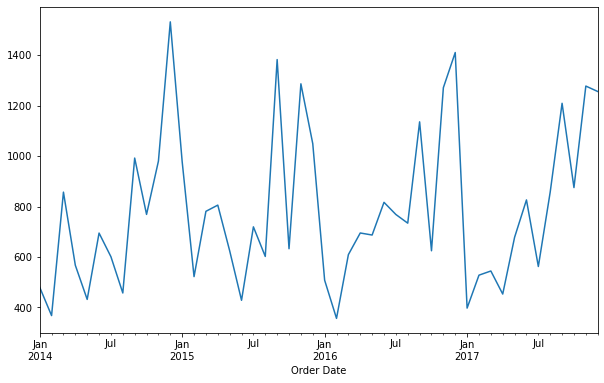

In [17]:
y.plot(figsize =(10,6))
plt.show()

In [18]:
train = y.loc[:'2016-12-31']
print(train.shape)
train.tail()

(36,)


Order Date
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [19]:
test = y.loc['2017-01-31':]
print(test.shape)
test.tail()

(12,)


Order Date
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

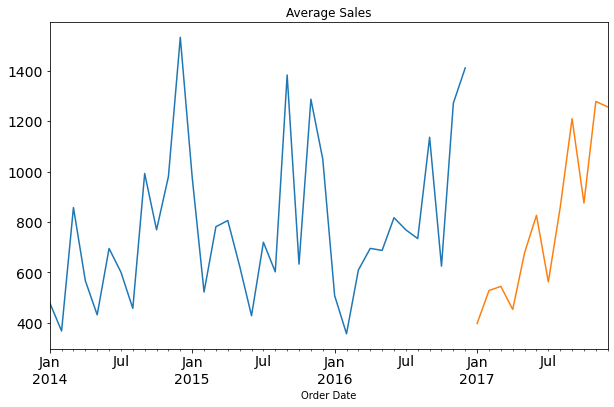

In [20]:
train.plot(figsize = (10,6),title = 'Average Sales', fontsize = 14)
test.plot(figsize = (10,6), title  ='Average Sales', fontsize = 14)
plt.show()

F:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
F:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


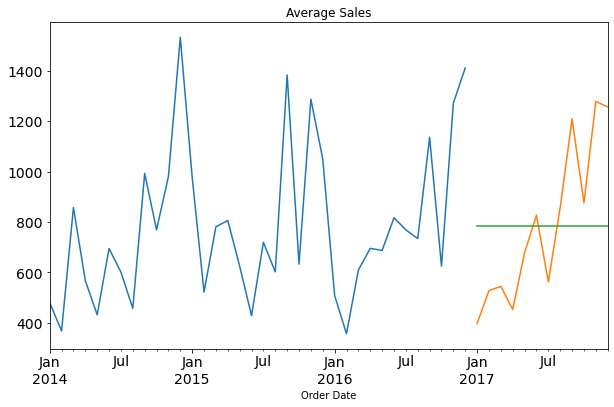

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing Level  = alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that order values are very less imp compared to the recent values
#values close to 1 indicate that order values are equally important

fit1 = SimpleExpSmoothing(train).fit(smoothing_level = 0.01)
Exp_Smooth['SES'] = fit1.forecast(steps= len(test))

train.plot(figsize=(10,6), title = 'Average Sales', fontsize =14)
test.plot(figsize=(10,6), title = 'Average Sales', fontsize = 14)
Exp_Smooth['SES'].plot(figsize=(10,6), title = 'Average Sales', fontsize= 14)
plt.show()


In [22]:
fit1.aic

415.87664216026513

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rms)

303.4766834364632


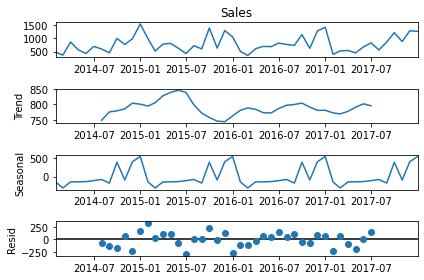

In [24]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
fig= decomposition.plot()
plt.show()

F:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\lenovo\AppData\Local\Temp/ipykernel_14036/2382308021.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train).fit(smoothing_level = 0.01, smoothing_slope = 0.25)
F:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


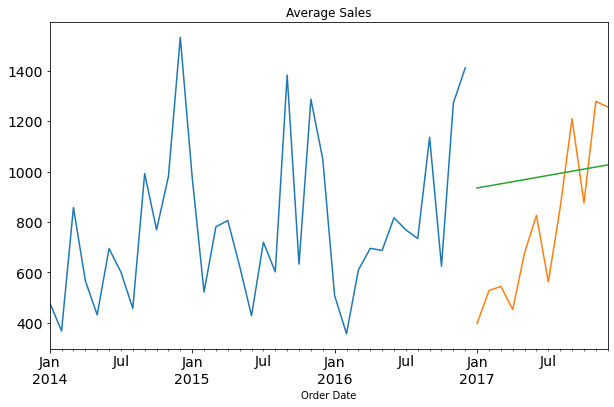

In [25]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#soothing slope = beta
fit1 = Holt(train).fit(smoothing_level = 0.01, smoothing_slope = 0.25)
Holt_df['Holt_Linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title ='Average Sales', fontsize= 14)
test.plot(figsize=(10,6), title = 'Average Sales', fontsize = 14)
Holt_df['Holt_Linear'].plot(figsize=(10,6), title = 'Average Sales', fontsize =14)
plt.show()


In [26]:
fit1.aic

416.9527957656208

In [27]:
Holt_df['Holt_Linear']

2017-01-31     934.737352
2017-02-28     943.060397
2017-03-31     951.383443
2017-04-30     959.706488
2017-05-31     968.029533
2017-06-30     976.352579
2017-07-31     984.675624
2017-08-31     992.998670
2017-09-30    1001.321715
2017-10-31    1009.644760
2017-11-30    1017.967806
2017-12-31    1026.290851
Freq: M, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_df['Holt_Linear']))
print(rms)

337.5376776259907


In [29]:
"""
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        Holt_df = test.copy()
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        print(fit1.aic,i,j)
"""

'\nfor i in np.arange(0,1,0.01):\n    for j in np.arange(0,1,0.01):\n        Holt_df = test.copy()\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        print(fit1.aic,i,j)\n'

F:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
F:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


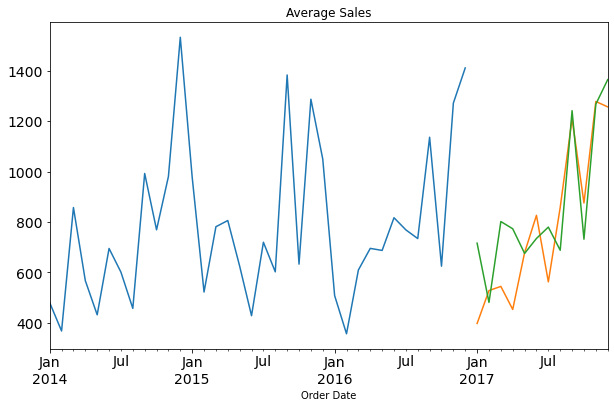

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()

fit1 = ExponentialSmoothing(train, seasonal_periods = 12,
                           trend = 'add',
                           seasonal = 'add').fit()
Holt_Winter_df['Holt_Winter'] =  fit1.forecast(steps=len(test))

train.plot(figsize = (10,6), title = 'Average Sales', fontsize = 14)
test.plot(figsize = (10,6), title = 'Average Sales', fontsize = 14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title = 'Average Sales', fontsize = 14)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

180.24951988279335


In [32]:
Holt_Winter_df['Holt_Winter']

2017-01-31     716.097455
2017-02-28     481.179729
2017-03-31     801.773306
2017-04-30     773.125765
2017-05-31     675.445426
2017-06-30     734.786446
2017-07-31     779.781587
2017-08-31     688.002830
2017-09-30    1241.302045
2017-10-31     731.851486
2017-11-30    1267.028858
2017-12-31    1364.211786
Freq: M, dtype: float64

In [33]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pmdarima as pm    

In [35]:
model = pm.auto_arima(y, start_p = 0, max_p = 3, d = None, max_d = 2, start_q =0, max_q=3,
                     start_P = 0,max_P =3, D=None, max_D= 2, start_Q=0, max_Q=3,
                     max_order=10, m=12, seasonal=True, information_criterion='aic',
                     test= 'adf', trace=True, random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.05 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.14 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.06 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.21 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.10 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.22 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.76 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.73 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.50 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.73 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.66 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [36]:
model.aic()

489.4176261246733

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
               order=(3,2,0), seasonal_order=(1,1,0,12)).fit()

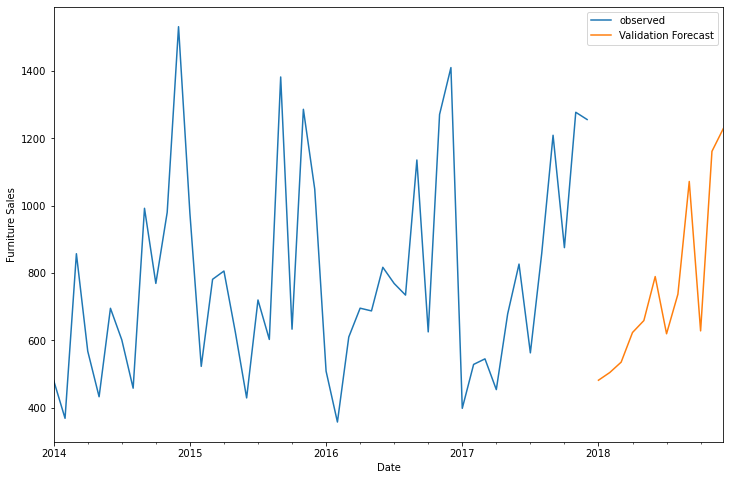

In [38]:
#pred = model.get_prediction(start= pd.to_datetime('2017-01-31'))
pred = model.get_forecast(steps =12)


plt.figure(figsize=(12,8))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [39]:
pred.predicted_mean

2018-01-31     481.175780
2018-02-28     504.162669
2018-03-31     534.896807
2018-04-30     623.058246
2018-05-31     658.537442
2018-06-30     789.387670
2018-07-31     619.269511
2018-08-31     736.930515
2018-09-30    1072.136415
2018-10-31     627.864093
2018-11-30    1161.662882
2018-12-31    1229.291154
Freq: M, Name: predicted_mean, dtype: float64

In [40]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)

111.96643040223135


F:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
F:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


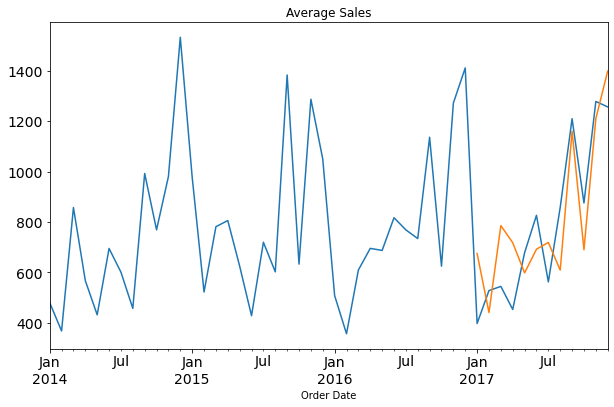

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(y,seasonal_periods=12,
                           trend = 'add',
                           seasonal = 'add').fit()
Y_predictions = fit1.predict(start= pd.to_datetime('2017-01-31'))
#Y_predictions= fit1.forecast(steps = 12)

y.plot(figsize = (10,6), title = 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title = 'Average Sales', fontsize= 14)
plt.show()

In [43]:
Y_predictions

2018-01-31     555.694822
2018-02-28     492.629918
2018-03-31     695.829381
2018-04-30     637.376731
2018-05-31     681.174482
2018-06-30     792.884594
2018-07-31     691.182619
2018-08-31     761.367917
2018-09-30    1211.998462
2018-10-31     794.568331
2018-11-30    1251.743717
2018-12-31    1406.625641
Freq: M, dtype: float64

In [44]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx", index= True)